In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install rasterio -q

In [3]:
!pip install geopandas -q

# Create GeoDataFrames for train, val, test (DO NOT RE-EXECUTE!)

In [ ]:
import geopandas

mlbs_shapefile_path = '/content/drive/MyDrive/ift6759_trees/data/raw/ITC/train_MLBS.shp'
osbs_shapefile_path = '/content/drive/MyDrive/ift6759_trees/data/raw/ITC/train_OSBS.shp'

mlbs = geopandas.read_file(mlbs_shapefile_path)
osbs = geopandas.read_file(osbs_shapefile_path)

In [ ]:
import pandas as pd

all = pd.concat([mlbs, osbs], ignore_index=True, axis=0)
all

,id,indvdID,geometry
0,57,MLBS01681,"POLYGON ((542071.187 4134996.073, 542071.187 4..."
1,45,MLBS01679,"POLYGON ((542055.000 4134998.793, 542058.995 4..."
2,49,MLBS01674,"POLYGON ((542060.170 4134993.382, 542060.170 4..."
3,63,MLBS01678,"POLYGON ((542057.702 4134991.627, 542057.702 4..."
4,50,MLBS01675,"POLYGON ((542061.068 4134991.193, 542061.068 4..."
...,...,...,...
1175,1037,OSBS00849,"POLYGON ((404886.400 3284465.000, 404886.400 3..."
1176,1034,OSBS00910,"POLYGON ((404906.000 3284467.630, 404899.070 3..."
1177,1032,OSBS07977,"POLYGON ((404891.840 3284470.990, 404891.840 3..."
1178,1035,OSBS00898,"POLYGON ((404891.740 3284466.870, 404891.740 3..."


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ift6759_trees/data/raw/Field/itc_rsFile.csv')
df

,id,indvdID,rsFile
0,57,MLBS01681,MLBS_1.tif
1,45,MLBS01679,MLBS_1.tif
2,49,MLBS01674,MLBS_1.tif
3,63,MLBS01678,MLBS_1.tif
4,50,MLBS01675,MLBS_1.tif
...,...,...,...
1175,1037,OSBS00849,OSBS_9.tif
1176,1034,OSBS00910,OSBS_9.tif
1177,1032,OSBS07977,OSBS_9.tif
1178,1035,OSBS00898,OSBS_9.tif


In [ ]:
all['rsFile'] = df['rsFile']
all

,id,indvdID,geometry,rsFile
0,57,MLBS01681,"POLYGON ((542071.187 4134996.073, 542071.187 4...",MLBS_1.tif
1,45,MLBS01679,"POLYGON ((542055.000 4134998.793, 542058.995 4...",MLBS_1.tif
2,49,MLBS01674,"POLYGON ((542060.170 4134993.382, 542060.170 4...",MLBS_1.tif
3,63,MLBS01678,"POLYGON ((542057.702 4134991.627, 542057.702 4...",MLBS_1.tif
4,50,MLBS01675,"POLYGON ((542061.068 4134991.193, 542061.068 4...",MLBS_1.tif
...,...,...,...,...
1175,1037,OSBS00849,"POLYGON ((404886.400 3284465.000, 404886.400 3...",OSBS_9.tif
1176,1034,OSBS00910,"POLYGON ((404906.000 3284467.630, 404899.070 3...",OSBS_9.tif
1177,1032,OSBS07977,"POLYGON ((404891.840 3284470.990, 404891.840 3...",OSBS_9.tif
1178,1035,OSBS00898,"POLYGON ((404891.740 3284466.870, 404891.740 3...",OSBS_9.tif


In [ ]:
all.to_file('/content/drive/MyDrive/ift6759_trees/data/raw/ITC/all.shp')

In [ ]:
import os

train_files = os.listdir('/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing/train/RGB')
val_files = os.listdir('/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing/val/RGB')
test_files = os.listdir('/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing/test/RGB')

In [ ]:
df_train = all.loc[all['rsFile'].isin(train_files)]
df_train.to_file('/content/drive/MyDrive/ift6759_trees/data/interim/ITC/train.shp', index=False)
df_train

,id,indvdID,geometry,rsFile
0,57,MLBS01681,"POLYGON ((542071.187 4134996.073, 542071.187 4...",MLBS_1.tif
1,45,MLBS01679,"POLYGON ((542055.000 4134998.793, 542058.995 4...",MLBS_1.tif
2,49,MLBS01674,"POLYGON ((542060.170 4134993.382, 542060.170 4...",MLBS_1.tif
3,63,MLBS01678,"POLYGON ((542057.702 4134991.627, 542057.702 4...",MLBS_1.tif
4,50,MLBS01675,"POLYGON ((542061.068 4134991.193, 542061.068 4...",MLBS_1.tif
...,...,...,...,...
1175,1037,OSBS00849,"POLYGON ((404886.400 3284465.000, 404886.400 3...",OSBS_9.tif
1176,1034,OSBS00910,"POLYGON ((404906.000 3284467.630, 404899.070 3...",OSBS_9.tif
1177,1032,OSBS07977,"POLYGON ((404891.840 3284470.990, 404891.840 3...",OSBS_9.tif
1178,1035,OSBS00898,"POLYGON ((404891.740 3284466.870, 404891.740 3...",OSBS_9.tif


In [ ]:
df_val = all.loc[all['rsFile'].isin(val_files)]
df_val.to_file('/content/drive/MyDrive/ift6759_trees/data/interim/ITC/val.shp', index=False)
df_val

,id,indvdID,geometry,rsFile
78,186,MLBS01793,"POLYGON ((544326.549 4142344.561, 544326.549 4...",MLBS_14.tif
79,690,MLBS01798,"POLYGON ((544322.797 4142348.244, 544322.797 4...",MLBS_14.tif
80,187,MLBS01789,"POLYGON ((544323.731 4142338.383, 544323.731 4...",MLBS_14.tif
81,188,MLBS01781,"POLYGON ((544317.519 4142338.544, 544317.519 4...",MLBS_14.tif
82,189,MLBS01785,"POLYGON ((544321.472 4142338.383, 544321.472 4...",MLBS_14.tif
...,...,...,...,...
970,1497,OSBS00011,"POLYGON ((406969.870 3283964.000, 406969.870 3...",OSBS_27.tif
971,1496,OSBS01298,"POLYGON ((406969.510 3283959.430, 406969.510 3...",OSBS_27.tif
972,1498,OSBS01268,"POLYGON ((406965.340 3283960.940, 406965.340 3...",OSBS_27.tif
1077,1303,OSBS01121,"POLYGON ((404685.570 3288445.420, 404685.570 3...",OSBS_16.tif


In [ ]:
df_test = all.loc[all['rsFile'].isin(test_files)]
df_test.to_file('/content/drive/MyDrive/ift6759_trees/data/interim/ITC/test.shp', index=False)
df_test

,id,indvdID,geometry,rsFile
191,273,MLBS02427,"POLYGON ((538213.057 4140953.092, 538213.057 4...",MLBS_20.tif
192,275,MLBS02421,"POLYGON ((538206.014 4140954.556, 538206.014 4...",MLBS_20.tif
193,274,MLBS02423,"POLYGON ((538211.200 4140953.937, 538211.200 4...",MLBS_20.tif
194,272,MLBS02419,"POLYGON ((538210.426 4140958.193, 538210.426 4...",MLBS_20.tif
195,280,MLBS02417,"POLYGON ((538213.516 4140953.592, 538213.516 4...",MLBS_20.tif
...,...,...,...,...
1050,1408,OSBS00006,"POLYGON ((408352.000 3285353.490, 408346.700 3...",OSBS_32.tif
1051,1403,OSBS00005,"POLYGON ((408352.000 3285366.050, 408351.550 3...",OSBS_32.tif
1052,1399,OSBS00004,"POLYGON ((408344.920 3285368.560, 408344.920 3...",OSBS_32.tif
1078,1303,OSBS01121,"POLYGON ((404685.570 3288445.420, 404685.570 3...",OSBS_35.tif


# Visualize

In [5]:
from glob import glob
import os

base_dir = '/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing'

train_list = sorted(glob(os.path.join(base_dir, 'train', 'RGB', '*.tif')))
val_list = sorted(glob(os.path.join(base_dir, 'val', 'RGB', '*.tif')))
test_list = sorted(glob(os.path.join(base_dir, 'test', 'RGB', '*.tif')))
len(train_list), len(val_list), len(test_list)

(66, 9, 9)

In [6]:
train_shp = '/content/drive/MyDrive/ift6759_trees/data/interim/ITC/train.shp'
val_shp = '/content/drive/MyDrive/ift6759_trees/data/interim/ITC/val.shp'
test_shp = '/content/drive/MyDrive/ift6759_trees/data/interim/ITC/test.shp'

In [7]:
import geopandas
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import ipywidgets as widgets
from ipywidgets import interact
from glob import glob
import os

@ interact(subset=widgets.Dropdown(options=['train', 'val', 'test'], value='train', description='Season'))
def choose_subset(subset):
  """
  Display rbg image with its bounding boxes
  """

  base_dir = '/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing'

  subset_list = sorted(glob(os.path.join(base_dir, subset, 'RGB', '*.tif'))) # list of subset files' path
  subset_shp = f'/content/drive/MyDrive/ift6759_trees/data/interim/ITC/{subset}.shp' # subset shapefile path

  @ interact(idx=widgets.IntSlider(min=0, max=len(subset_list)-1, step=1, value=0, description='Case #:'))
  def show_rbg_with_bboxes(idx):
    
    img_path = subset_list[idx] 
    img_name = os.path.basename(img_path) # get filename

    img = rasterio.open(img_path) 
    print(img.read().shape)
    
    bboxes = geopandas.read_file(subset_shp) 
    bboxes_img = bboxes[bboxes.rsFile == img_name] # get image bounding boxes 
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_title(img_name)
    rasterio.plot.show(img, ax=ax)
    bboxes_img.plot(ax=ax, facecolor='none', edgecolor='red')

interactive(children=(Dropdown(description='Season', options=('train', 'val', 'test'), value='train'), Output(…

# Convert geographic coordinate to pixel and create new dfs (DO NOT RE-EXECUTE!)

In [58]:
!pip install GDAL -q

In [117]:
from osgeo import gdal
 
# https://gis.stackexchange.com/questions/221292/retrieve-pixel-value-with-geographic-coordinate-as-input-with-gdal

def convert_geo_to_pixel(subset, filename, minx, miny, maxx, maxy):
  base_dir = '/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing'
  file_path = os.path.join(base_dir, subset, 'RGB', filename) #path to raster
  dataset = gdal.Open(file_path)
  band = dataset.GetRasterBand(1)
  # print(band)

  cols = dataset.RasterXSize
  rows = dataset.RasterYSize
  # print(cols, rows)

  transform = dataset.GetGeoTransform()

  xOrigin = transform[0]
  yOrigin = transform[3]
  pixelWidth = transform[1]
  pixelHeight = -transform[5]
  # print(xOrigin, yOrigin, pixelWidth, pixelHeight)

  data = band.ReadAsArray(0, 0, cols, rows)
  # print(data.shape)

  minx_pixel = int((minx - xOrigin) / pixelWidth)
  miny_pixel = int((yOrigin - miny ) / pixelHeight)
  maxx_pixel = int((maxx - xOrigin) / pixelWidth)
  maxy_pixel = int((yOrigin - maxy ) / pixelHeight)

  # print(col) # x
  # print('===')
  # print(row) # y 
  # print('===')
  return minx_pixel, miny_pixel, maxx_pixel, maxy_pixel


In [122]:
subset = 'test'
df = pd.read_csv(f'/content/drive/MyDrive/ift6759_trees/data/interim/ITC/{subset}.csv')
tmp = df.apply(lambda row: convert_geo_to_pixel(subset, row.rsFile, row.minx, row.miny, row.maxx, row.maxy), axis=1)
tmp

0      (100, 199, 161, 168)
1        (30, 184, 99, 102)
2       (81, 190, 122, 152)
3        (74, 148, 153, 52)
4       (105, 194, 200, 70)
               ...         
129    (147, 195, 200, 147)
130      (195, 69, 200, 57)
131       (129, 44, 192, 3)
132       (55, 95, 117, 21)
133       (0, 198, 122, 50)
Length: 134, dtype: object

In [123]:
df['minx_pixel'] = tmp.apply(lambda row: row[0])
df['miny_pixel'] = tmp.apply(lambda row: row[1])
df['maxx_pixel'] = tmp.apply(lambda row: row[2])
df['maxy_pixel'] = tmp.apply(lambda row: row[3])
df.to_csv(f'/content/drive/MyDrive/ift6759_trees/data/interim/ITC/{subset}_pixel.csv', index=False)

# Visualize as image

In [4]:
def draw_bounding_box(img, row):
    
    x_min = row.minx_pixel
    y_min = row.miny_pixel
    x_max = row.maxx_pixel
    y_max = row.maxy_pixel

    img_with_bboxes = cv2.rectangle(img, (x_min,y_min),(x_max,y_max), (255, 0, 0), 1)
    plt.imshow(img_with_bboxes.astype("uint8"))

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
from ipywidgets import interact
from glob import glob
import os

@ interact(subset=widgets.Dropdown(options=['train', 'val', 'test'], value='train', description='Season'))
def choose_subset(subset):
  """
  Display rbg image with its bounding boxes
  """

  base_dir = '/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing'

  subset_list = sorted(glob(os.path.join(base_dir, subset, 'RGB', '*.tif'))) # list of subset files' path
  subset_csv = f'/content/drive/MyDrive/ift6759_trees/data/interim/ITC/{subset}_pixel.csv' # subset shapefile path

  @ interact(idx=widgets.IntSlider(min=0, max=len(subset_list)-1, step=1, value=0, description='Case #:'))
  def show_rbg_with_bboxes(idx):
    
    img_path = subset_list[idx] 
    img_name = os.path.basename(img_path) # get filename

    # img = rasterio.open(img_path) 
    # img = img.read(1)

    img = cv2.imread(img_path, -1)
    
    bboxes = pd.read_csv(subset_csv) 
    bboxes_img = bboxes[bboxes.rsFile == img_name] # get image bounding boxes 

    for index, row in bboxes_img.iterrows():
        draw_bounding_box(img, row)

interactive(children=(Dropdown(description='Season', options=('train', 'val', 'test'), value='train'), Output(…

# Pipeline

In [6]:
!pip install -U git+https://github.com/albumentations-team/albumentations -q
!pip install timm -q
!pip install --upgrade opencv-contrib-python -q

  Preparing metadata (setup.py) ... done


In [7]:
import pandas as pd 
import numpy as np 
import torch
from tqdm.notebook import tqdm

In [8]:
train_csv_file = '/content/drive/MyDrive/ift6759_trees/data/interim/ITC/train_pixel.csv'
train_data_dir = '/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing/train/RGB'

val_csv_file = '/content/drive/MyDrive/ift6759_trees/data/interim/ITC/val_pixel.csv'
val_data_dir = '/content/drive/MyDrive/ift6759_trees/data/interim/RemoteSensing/val/RGB'


device = 'cuda'

batch_size = 16
img_size = 200

lr = 0.001
epochs = 40
model = 'efficientnet_b0'

num_cor = 4

In [9]:
train_df = pd.read_csv(train_csv_file) 
train_df

,minx,miny,maxx,maxy,id,indvdID,rsFile,minx_pixel,miny_pixel,maxx_pixel,maxy_pixel
0,542071.186834,4.134996e+06,542074.969940,4.134999e+06,57,MLBS01681,MLBS_1.tif,161,29,199,0
1,542055.000000,4.134994e+06,542058.995294,4.134999e+06,45,MLBS01679,MLBS_1.tif,0,46,39,2
2,542060.169555,4.134993e+06,542064.969398,4.134998e+06,49,MLBS01674,MLBS_1.tif,51,56,99,13
3,542057.701672,4.134992e+06,542061.088781,4.134995e+06,63,MLBS01678,MLBS_1.tif,27,73,60,35
4,542061.068128,4.134991e+06,542069.577248,4.134997e+06,50,MLBS01675,MLBS_1.tif,60,78,145,19
...,...,...,...,...,...,...,...,...,...,...,...
926,404886.400000,3.284465e+06,404893.920000,3.284466e+06,1037,OSBS00849,OSBS_9.tif,4,200,79,188
927,404899.070000,3.284468e+06,404906.000000,3.284476e+06,1034,OSBS00910,OSBS_9.tif,130,173,200,93
928,404891.840000,3.284471e+06,404899.850000,3.284478e+06,1032,OSBS07977,OSBS_9.tif,58,140,138,73
929,404891.740000,3.284467e+06,404899.050000,3.284472e+06,1035,OSBS00898,OSBS_9.tif,57,181,130,129


In [10]:
val_df = pd.read_csv(val_csv_file) 
val_df

,minx,miny,maxx,maxy,id,indvdID,rsFile,minx_pixel,miny_pixel,maxx_pixel,maxy_pixel
0,544326.548574,4.142345e+06,544328.880060,4.142351e+06,186,MLBS01793,MLBS_14.tif,175,134,198,73
1,544322.797261,4.142348e+06,544328.880060,4.142358e+06,690,MLBS01798,MLBS_14.tif,137,97,198,0
2,544323.731048,4.142338e+06,544328.880060,4.142344e+06,187,MLBS01789,MLBS_14.tif,147,196,198,138
3,544317.518985,4.142339e+06,544323.731048,4.142346e+06,188,MLBS01781,MLBS_14.tif,85,194,147,124
4,544321.472116,4.142338e+06,544327.684179,4.142339e+06,189,MLBS01785,MLBS_14.tif,124,196,186,185
...,...,...,...,...,...,...,...,...,...,...,...
110,406967.630000,3.283961e+06,406969.870000,3.283964e+06,1497,OSBS00011,OSBS_27.tif,66,31,88,0
111,406969.510000,3.283959e+06,406973.340000,3.283962e+06,1496,OSBS01298,OSBS_27.tif,85,45,123,19
112,406965.340000,3.283961e+06,406967.420000,3.283962e+06,1498,OSBS01268,OSBS_27.tif,43,30,64,15
113,404685.570000,3.288445e+06,404691.780000,3.288453e+06,1303,OSBS01121,OSBS_16.tif,55,95,117,21


In [11]:
import albumentations as A

In [12]:
train_augs = A.Compose([
    A.Resize(img_size, img_size),
    A.HorizontalFlip(p = 0.5),
    A.VerticalFlip(p = 0.5),
    A.Rotate()
], bbox_params = A.BboxParams(format = 'pascal_voc', label_fields = ['class_labels']))

val_augs = A.Compose([
    A.Resize(img_size, img_size),
], bbox_params = A.BboxParams(format = 'pascal_voc', label_fields = ['class_labels']))

In [13]:
class ObjLocDataset(torch.utils.data.Dataset):

  def __init__(self, df, data_dir, augmentations = None):
    self.df = df
    self.augmentations = augmentations
    self.data_dir = data_dir
  
  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):

    xmin = self.df.minx_pixel[idx]
    ymin = self.df.miny_pixel[idx]
    xmax = self.df.maxx_pixel[idx]
    ymax = self.df.maxy_pixel[idx]

    bbox = [[xmin, ymin, xmax, ymax]]

    img_path = os.path.join(self.data_dir, self.df.rsFile[idx])
    # img = rasterio.open(img_path)
    # img = img.read()
    # print(img.shape)

    img = cv2.imread(img_path, -1)
    img = cv2.normalize(img, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    if self.augmentations:
      data = self.augmentations(image = img, bboxes = bbox, class_labels = [None])
      img = data['image']
      bbox = data['bboxes'][0]

    img = torch.from_numpy(img).permute(2, 0, 1) # (c, h, w) for PyTorch
    bbox = torch.Tensor(bbox[0])

    return img, bbox

In [14]:
trainset = ObjLocDataset(train_df, train_data_dir)
valset = ObjLocDataset(val_df, val_data_dir)

In [15]:
print(f'Total examples in the train set: {len(trainset)}')
print(f'Total examples in the val set: {len(valset)}')

Total examples in the train set: 931
Total examples in the val set: 115


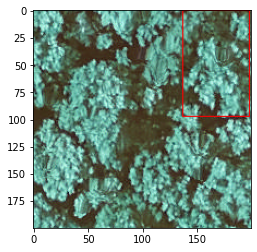

In [16]:
import cv2

idx = 1
img, bbox = valset[idx]

xmin, ymin, xmax, ymax = bbox

pt1 = (int(xmin), int(ymin))
pt2 = (int(xmax), int(ymax))

bnd_img = cv2.rectangle(img.permute(1, 2, 0).numpy(),pt1, pt2,(255,0,0),1)
plt.imshow(bnd_img)

In [17]:
img.max()

tensor(255.)

In [18]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
valloader = torch.utils.data.DataLoader(valset, batch_size = batch_size, shuffle = False)

In [19]:
print("Total no. batches in trainloader : {}".format(len(trainloader)))
print("Total no. batches in validloader : {}".format(len(valloader)))

Total no. batches in trainloader : 59
Total no. batches in validloader : 8


In [20]:
for images, bboxes in trainloader:
  break;


print(f"Shape of one batch images : {images.shape}")
print(f"Shape of one batch bboxes : {bboxes.shape}")

Shape of one batch images : torch.Size([16, 3, 200, 200])
Shape of one batch bboxes : torch.Size([16, 4])


In [21]:
from torch import nn 
import timm

In [22]:
class ObjLocModel(nn.Module):

  def __init__(self):
    super(ObjLocModel, self).__init__()

    self.backbone = timm.create_model(model, pretrained = True, num_classes = 4) # 4 for the 4 coordinates

  def forward(self, images, gt_bboxes = None):

    bboxes = self.backbone(images)

    if gt_bboxes != None:
      loss = nn.MSELoss()(bboxes, gt_bboxes)
      return bboxes, loss

    return bboxes

In [23]:
model = ObjLocModel()
model.to(device)

ObjLocModel(
  (backbone): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(

In [24]:
random_img = torch.rand(1, 3, 140, 140).to(device)
model(random_img).shape

torch.Size([1, 4])

In [25]:
def train_fn(model, dataloader, optimizer):
  total_loss = 0.0
  model.train() # Dropout ON

  for data in tqdm(dataloader):

    images, gt_bboxes = data
    images, gt_bboxes = images.to(device), gt_bboxes.to(device)

    bboxes, loss = model(images, gt_bboxes)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  return total_loss/len(dataloader)

In [26]:
def eval_fn(model, dataloader):
  total_loss = 0.0
  model.eval() # Dropout OFF

  with torch.no_grad():
    for data in tqdm(dataloader):

      images, gt_bboxes = data
      images, gt_bboxes = images.to(device), gt_bboxes.to(device)

      bboxes, loss = model(images, gt_bboxes)


      total_loss += loss.item()

    return total_loss/len(dataloader)

In [27]:
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [28]:
best_val_loss = np.Inf

for i in range(epochs):

  train_loss = train_fn(model, trainloader, optimizer)
  val_loss = eval_fn(model, valloader)

  if val_loss < best_val_loss:
    torch.save(model.state_dict(), '/content/drive/MyDrive/ift6759_trees/models/best_model.pt')
    print('Weights are saved!')
    best_val_loss = val_loss

  print(f'Epoch: {i + 1} train loss: {train_loss} val loss: {val_loss}')

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Weights are saved!
Epoch: 1 train loss: 6390.23096944518 val loss: 3438.773651123047


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Weights are saved!
Epoch: 2 train loss: 3683.095405190678 val loss: 3306.2740173339844


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Weights are saved!
Epoch: 3 train loss: 3396.533422437765 val loss: 3169.4940185546875


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 4 train loss: 3339.8775158898306 val loss: 3229.1492614746094


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 5 train loss: 3324.8225014896716 val loss: 3298.429443359375


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 6 train loss: 3317.1017445709745 val loss: 3284.2686157226562


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 7 train loss: 3309.664033534163 val loss: 3233.4556579589844


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 8 train loss: 3289.962141651218 val loss: 3270.9109802246094


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 9 train loss: 3291.018256753178 val loss: 3222.179473876953


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 10 train loss: 3272.1702280852755 val loss: 3220.901824951172


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 11 train loss: 3281.0354376324153 val loss: 3312.1060180664062


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 12 train loss: 3208.7911356263244 val loss: 3563.757598876953


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 13 train loss: 3241.584691969015 val loss: 3190.889404296875


  0%|          | 0/59 [00:00<?, ?it/s]

KeyboardInterrupt: ignored